# **Name: Anushree Bharat Salunke**
# **Div: C**
# **Moodle ID: 20102179**
# **Roll no: 19**
# **DL LAB**

# **Experiment Number: 5**
# **Aim: Implement Backpropagation using Keras Library**


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import tensorflow
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DL/placementdataset.csv')

In [ ]:
df.head()

,CGPA,Profile_Score,Placed
0,8.5,9.0,1
1,7.8,8.2,1
2,9.3,9.5,1
3,6.9,7.1,0
4,7.2,6.8,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CGPA           100 non-null    float64
 1   Profile_Score  100 non-null    float64
 2   Placed         100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [ ]:
df.duplicated().sum()

7

In [ ]:
df = df.drop_duplicates()


In [ ]:
df.duplicated().sum()


0

In [ ]:
df.shape

(93, 3)

In [ ]:
# Separate features (X) and target variable (y)
X = df[['CGPA', 'Profile_Score']]
y = df['Placed']


In [ ]:
X.head()


,CGPA,Profile_Score
0,8.5,9.0
1,7.8,8.2
2,9.3,9.5
3,6.9,7.1
4,7.2,6.8


In [ ]:
y


0     1
1     1
2     1
3     0
4     0
     ..
94    0
95    0
96    1
97    0
98    0
Name: Placed, Length: 93, dtype: int64

In [ ]:
# Step 2: Build the Neural Network Model
model = Sequential()
model.add(Dense(4, input_dim=2, activation='relu')) # Input layer with 2 neurons
model.add(Dense(4, activation='relu')) # Hidden layer with 4 neurons
model.add(Dense(1, activation='sigmoid')) # Output layer with 1 neuron

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 12        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 37 (148.00 Byte)
Trainable params: 37 (148.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.get_weights()


[array([[-0.21820593,  0.4657619 , -0.49218297, -0.7477436 ],
        [ 0.99022865,  0.65633154,  0.6297145 ,  0.38559628]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[ 0.7672635 ,  0.2787109 , -0.40291482, -0.4299329 ],
        [ 0.44402117, -0.4623753 , -0.33657908,  0.47093052],
        [-0.3704765 , -0.6789523 ,  0.27953845,  0.00619799],
        [ 0.7153004 ,  0.28941792,  0.09303606, -0.73047006]],
       dtype=float32),
 array([0., 0., 0., 0.], dtype=float32),
 array([[-0.88506126],
        [ 0.29127455],
        [ 0.1761483 ],
        [ 0.11661732]], dtype=float32),
 array([0.], dtype=float32)]

In [ ]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Step 3: Train the Model
history = model.fit(X, y, epochs=100, batch_size=1, verbose=1)


Epoch 1/100
93/93 [==============================] - 1s 2ms/step - loss: 3.3999 - accuracy: 0.4194
Epoch 2/100
93/93 [==============================] - 0s 2ms/step - loss: 1.6559 - accuracy: 0.4194
Epoch 3/100
93/93 [==============================] - 0s 2ms/step - loss: 0.8186 - accuracy: 0.3548
Epoch 4/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5806
Epoch 5/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6880 - accuracy: 0.5806
Epoch 6/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6864 - accuracy: 0.5806
Epoch 7/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6870 - accuracy: 0.5806
Epoch 8/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.5806
Epoch 9/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6776 - accuracy: 0.5806
Epoch 10/100
93/93 [==============================] - 0s 2ms/step - loss: 0.6807 - accuracy: 0.5806
Epoch 11/

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X, y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

3/3 [==============================] - 0s 5ms/step - loss: 0.4519 - accuracy: 0.7849
Loss: 0.45186954736709595, Accuracy: 0.7849462628364563


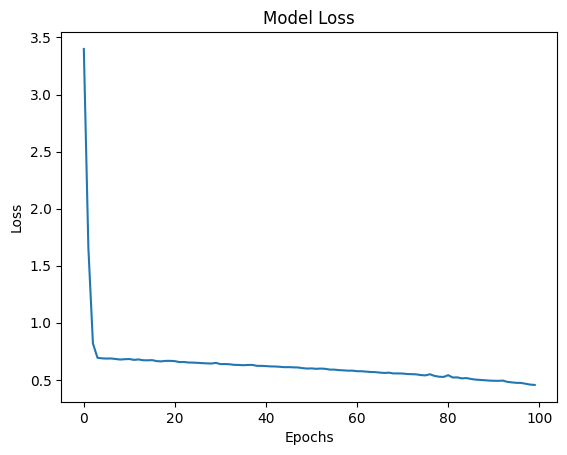

In [ ]:
# Plot the training loss
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()


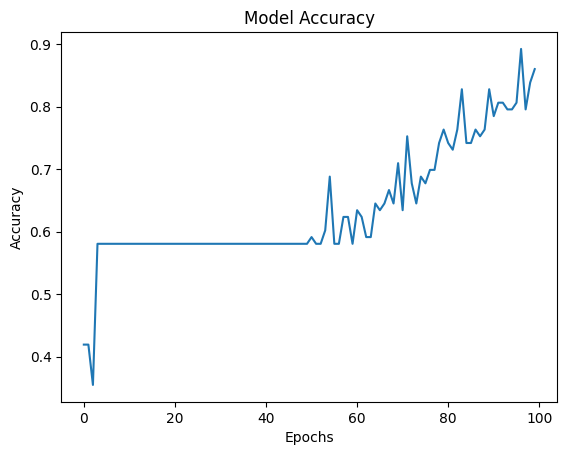

In [ ]:
# Plot the training accuracy
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Get the weights and biases of all layers
weights_biases = []
for layer in model.layers:
  weights_biases.append(layer.get_weights())


In [ ]:
for i, (weights, biases) in enumerate(weights_biases):
  print(f"Layer {i + 1} Weights:")
  print(weights)
  print(f"Layer {i + 1} Biases:")
  print(biases)


Layer 1 Weights:
[[-0.4054291   0.28004    -0.29438564 -0.7477436 ]
 [ 0.74544305  0.52198863  0.88899183  0.38559628]]
Layer 1 Biases:
[ 0.79850453 -1.0924894  -0.8543225   0.        ]
Layer 2 Weights:
[[ 0.58026963  0.2787109  -0.40291482 -0.20473942]
 [ 0.1458409  -0.4623753  -0.33657908  0.8018207 ]
 [-0.7747885  -0.6789523   0.27953845  0.43313903]
 [ 0.7153004   0.28941792  0.09303606 -0.73047006]]
Layer 2 Biases:
[ 0.8152265  0.         0.        -0.8246767]
Layer 3 Weights:
[[-1.2509075 ]
 [ 0.29127455]
 [ 0.1761483 ]
 [ 0.5638938 ]]
Layer 3 Biases:
[-0.7801667]


In [ ]:
#predict for new data using our model
import numpy as np
new_data = np.array([[8.1, 6.1]])
prediction = model.predict(new_data)

1/1 [==============================] - 0s 83ms/step


In [ ]:
prediction

array([[0.45673996]], dtype=float32)

In [ ]:
prediction_binary = (prediction > 0.5).astype(int)
print("Prediction:", prediction_binary)

Prediction: [[0]]


In [ ]:
new_data = np.array([[4.1, 7.1]])
prediction = model.predict(new_data)
prediction_binary = (prediction > 0.5).astype(int)
print("Prediction:", prediction_binary)

1/1 [==============================] - 0s 19ms/step
Prediction: [[1]]


In [ ]:
new_data = np.array([[4.1, 7.1]])
prediction = model.predict(new_data)
prediction_binary = (prediction > 0.5).astype(int)
print("Prediction:", prediction_binary)

1/1 [==============================] - 0s 19ms/step
Prediction: [[1]]
